#### 1. IMPORT DEPENDENCIES


In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os,shutil
from pathlib import Path
import labelme
import albumentations as A
import time
import cv2
import json
import uuid
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
PATH = {
    'data':os.path.join('data'),
    'image':os.path.join('data','image'),
    'label':os.path.join('data','label'),
    'train':os.path.join('data','train'),
    'train_image':os.path.join('data','train','image'),
    'train_label':os.path.join('data','train','label'),
    'test':os.path.join('data','test'),
    'test_image':os.path.join('data','test','image'),
    'test_label':os.path.join('data','test','label'),
    'val':os.path.join('data','val'),
    'val_image':os.path.join('data','val','image'),
    'val_label':os.path.join('data','val','label'),
}

for x in PATH:
    os.makedirs(PATH[x],exist_ok=True)

#### 2. GET AND LABEL IMAGES

In [ ]:
number_of_images = 10

cap = cv2.VideoCapture(0)
for i in range(number_of_images):
    ret,frame = cap.read()
    image_filename = os.path.join(PATH['image'],f"{str(uuid.uuid1())}.jpg")
    cv2.imwrite(image_filename,frame)
    cv2.imshow('frame',frame)
    time.sleep(1)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [ ]:
! labelme

In [ ]:
img = cv2.imread(os.path.join(PATH['image'],'2a2c8d38-360a-11ee-ab72-80e82c11f1a6.jpg'))
lb = os.path.join(PATH['label'],'2a2c8d38-360a-11ee-ab72-80e82c11f1a6.json')
with open(lb) as f:
    label =json.load(f)
label


{'version': '5.2.1',
 'flags': {},
 'shapes': [{'label': 'face',
   'points': [[290.21276595744683, 87.87234042553195],
    [415.74468085106383, 232.55319148936172]],
   'group_id': None,
   'description': '',
   'shape_type': 'rectangle',
   'flags': {}}],
 'imagePath': '..\\images\\2a2c8d38-360a-11ee-ab72-80e82c11f1a6.jpg',
 'imageData': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAHgAoADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYG

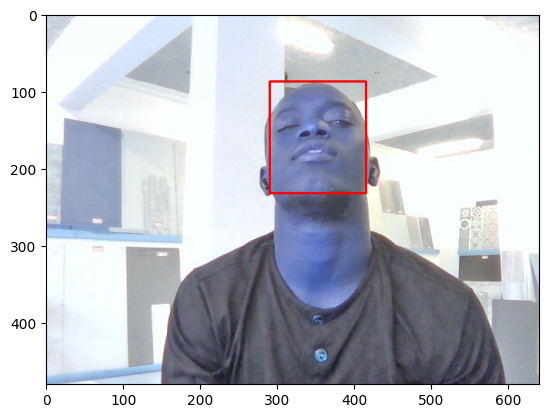

In [ ]:



bbox = np.array(label['shapes'][0]['points']).ravel().tolist()

cv2.rectangle(img,
              np.array(bbox[:2]).astype(int).tolist(),
              np.array(bbox[2:]).astype(int).tolist(),
              (255,0,0),2
              )

plt.imshow(img)

#### 3. SPLIT TO TRAIN,TEST AND VAL LABELS

In [ ]:
image_filename = tf.data.Dataset.list_files('data/image/*.jpg',shuffle=False)
image_filename = [file.decode() for file in image_filename.as_numpy_iterator()]
image_filename

train_img,test_val_img = train_test_split(image_filename,test_size=0.3,random_state=42)
test_img,val_img = train_test_split(test_val_img,test_size=0.5,random_state=42)

def copy_imgfile(img_list,destination):
    for img in img_list:
        image = os.path.abspath(img)
        shutil.copy(image,destination)

copy_imgfile(train_img,PATH['train_image'])
copy_imgfile(test_img,PATH['test_image'])
copy_imgfile(val_img,PATH['val_image'])


In [ ]:
train_stem_imgname = os.listdir(PATH['train_image'])
test_stem_imgname = os.listdir(PATH['test_image'])
val_stem_imgname = os.listdir(PATH['val_image'])

for images in [train_img,test_img,val_img]:
    for i in images:
        try:
            img_stem_name = str(Path(i).stem) + '.jpg'
            img_label_name = str(Path(i).stem) + '.json'

            if img_stem_name in train_stem_imgname:
                shutil.copy(os.path.abspath(os.path.join(PATH['label'],img_label_name)),PATH['train_label'])

            if img_stem_name in test_stem_imgname:
                shutil.copy(os.path.abspath(os.path.join(PATH['label'],img_label_name)),PATH['test_label'])

            if img_stem_name in val_stem_imgname:
                shutil.copy(os.path.abspath(os.path.join(PATH['label'],img_label_name)),PATH['val_label'])
        except:
            pass

        


In [ ]:
PATH

{'data': 'data',
 'image': 'data\\image',
 'label': 'data\\label',
 'train': 'data\\train',
 'train_image': 'data\\train\\image',
 'train_label': 'data\\train\\label',
 'test': 'data\\test',
 'test_image': 'data\\test\\image',
 'test_label': 'data\\test\\label',
 'val': 'data\\val',
 'val_image': 'data\\val\\image',
 'val_label': 'data\\val\\label'}

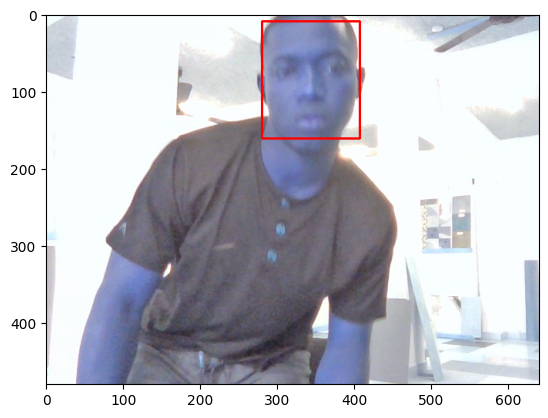

In [ ]:
img = cv2.imread(os.path.join(PATH['test_image'],'6a4fb405-360a-11ee-807e-80e82c11f1a6.jpg'))
lb = os.path.join(PATH['test_label'],'6a4fb405-360a-11ee-807e-80e82c11f1a6.json')
with open(lb) as f:
    label =json.load(f)
label

bbox = np.array(label['shapes'][0]['points']).ravel().tolist()

cv2.rectangle(img,
              np.array(bbox[:2]).astype(int).tolist(),
              np.array(bbox[2:]).astype(int).tolist(),
              (255,0,0),2
              )

plt.imshow(img)

#### 4. LOAD IMAGES AND CREATE DATASET

In [ ]:
def create_dataset(pattern):
    dataset = tf.data.Dataset.list_files(pattern)
    dataset = dataset.map(load_images)
    return dataset

def load_images(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

train_dataset = create_dataset('data/image/*.jpg')
train_dataset

<_MapDataset element_spec=TensorSpec(shape=(None, None, None), dtype=tf.uint8, name=None)>

#### 5 DATA AUGMENTATION WITH ALBUMENTATION

In [ ]:
with open('data/label/2a2c8d38-360a-11ee-ab72-80e82c11f1a6.json','r') as f:
    label = json.load(f)
label

{'version': '5.2.1',
 'flags': {},
 'shapes': [{'label': 'face',
   'points': [[290.21276595744683, 87.87234042553195],
    [415.74468085106383, 232.55319148936172]],
   'group_id': None,
   'description': '',
   'shape_type': 'rectangle',
   'flags': {}}],
 'imagePath': '..\\images\\2a2c8d38-360a-11ee-ab72-80e82c11f1a6.jpg',
 'imageData': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAHgAoADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYG

In [14]:
def load_json(x):
    with open(x) as f:
        label = json.load(f)
    bbox = np.array(label['shapes'][0]['points']).ravel().tolist()
    return bbox

img = cv2.imread('data/train/image/2a2c8d38-360a-11ee-ab72-80e82c11f1a6.jpg')
    
bbox = load_json('data/train/label/2a2c8d38-360a-11ee-ab72-80e82c11f1a6.json')
bbox

[290.21276595744683, 87.87234042553195, 415.74468085106383, 232.55319148936172]

In [ ]:
augmentor = A.Compose(
    [A.RandomCrop(width=450,height=450),
     A.HorizontalFlip(0.5),
     A.RandomBrightnessContrast(p=0.2),
     A.RGBShift(p=0.2),
     A.VerticalFlip(p=0.5)],
     bbox_params=A.BboxParams(format='albumentations',label_fields=['class_labels'])
)

In [15]:
augmentor = A.Compose([
    A.RandomCrop(width=450,height=450),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RGBShift(p=0.2),
    A.RandomBrightnessContrast(p=0.2)],
    bbox_params = A.BboxParams(format='albumentations',label_fields=['class_labels'])
    )

x = augmentor(image=img,bboxes=[np.divide(bbox,[640,480,640,480]).tolist()],class_labels=['face'])

In [ ]:
x['image'].shape

(450, 450, 3)

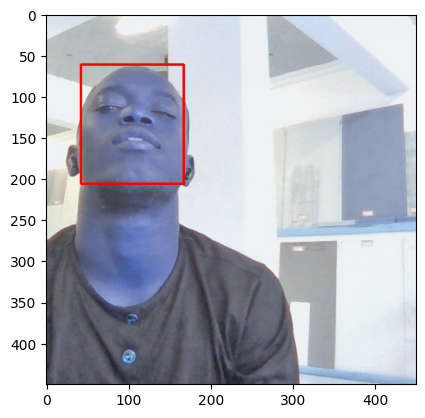

In [ ]:
def plot_aug_image(x):
    bbox = x['bboxes'][0]
    img = x['image']
    cv2.rectangle(img,
                    tuple(np.multiply(bbox[:2],[450,450]).astype(int)),
                    tuple(np.multiply(bbox[2:],[450,450]).astype(int)),
                    (255,0,0),2)
    plt.imshow(img)

plot_aug_image(x)

In [33]:
AUG_PATH = {
    'aug_data':os.path.join('aug_data'),
    'train':os.path.join('aug_data','train'),
    'train_image':os.path.join('aug_data','train','image'),
    'train_label':os.path.join('aug_data','train','label'),
    'test':os.path.join('aug_data','test'),
    'test_image':os.path.join('aug_data','test','image'),
    'test_label':os.path.join('aug_data','test','label'),
    'val':os.path.join('aug_data','val'),
    'val_image':os.path.join('aug_data','val','image'),
    'val_label':os.path.join('aug_data','val','label'),
}

for x in AUG_PATH:
    os.makedirs(AUG_PATH[x],exist_ok=True)

In [34]:

num_of_sample = 60

for filelist in ['train','test','val']:
    for image in os.listdir(os.path.join('data',filelist,'image')):
        image_abspath = os.path.abspath(os.path.join('data',filelist,'image',image))
        label_abspath = os.path.abspath(os.path.join('data',filelist,'label',str(Path(image).stem) + '.json'))
        img_array = cv2.imread(image_abspath)
        
        if os.path.exists(label_abspath):
            with open(label_abspath) as f:
                label = json.load(f)
            
            bbox = np.array(label['shapes'][0]['points']).ravel().tolist()
            bbox_alb = np.divide(bbox,[640,480,640,480])
            label = 1

        else:
            bbox_alb = [0,0,0.00000000000001,0.0000000000001]
            label = 0
        

        try:
            for i in range(num_of_sample):
                augmented_image_abspath = os.path.join('aug_data',filelist,'image',f"{str(Path(image).stem)}_{i}.jpg")
                augmented_label_abspath = os.path.join('aug_data',filelist,'label',f"{str(Path(image).stem)}_{i}.json")
                augmented_image = augmentor(image=img_array,bboxes=[bbox_alb],class_labels=[label])
                cv2.imwrite(augmented_image_abspath,augmented_image['image'])
                label_dict = {}
                label_dict['images'] = image
                

                if os.path.exists(label_abspath):
                    if len(augmented_image['bboxes']) == 0:             
                        label_dict['bboxes'] = [0,0,0,0]
                        label_dict['label'] = 0
                    else:
                        label_dict['bboxes'] = augmented_image['bboxes'][0]
                        label_dict['label'] = 1
                else:
                    label_dict['bboxes'] = [0,0,0,0]
                    label_dict['label'] = 0

                
                    
                with open(augmented_label_abspath,'w') as f:
                    json.dump(label_dict,f)
        except:
            continue
            


In [3]:
def create_dataset(directory):
    image_dataset_dir = os.path.join(directory,'image','*.jpg')
    label_dataset_dir = os.path.join(directory,'label','*.json')
    img = tf.data.Dataset.list_files(image_dataset_dir,shuffle=False)
    decode_img = img.map(read_image)

    json_file = tf.data.Dataset.list_files(label_dataset_dir,shuffle=False)
    json_file = json_file.map(lambda x:tf.py_function(load_json,[x],[tf.int8,tf.float32]))
    dataset = tf.data.Dataset.zip((decode_img,json_file))
    dataset = dataset.shuffle(5000)
    dataset = dataset.batch(8)
    dataset = dataset.prefetch(4)
    return dataset


def read_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    resized_img = tf.image.resize(img,(120,120))
    resized_img /= 255.0
    return resized_img


def load_json(x):
    with open(x.numpy(),'r',encoding='utf') as f:
        label = json.load(f)
    bbox = label['bboxes']
    classes = label['label']
    return [classes,bbox]

all_dataset = create_dataset('aug_data/train/')
    

In [50]:
z = all_dataset.as_numpy_iterator().next()
z

(array([[[[0.61066175, 0.6039216 , 0.48474264],
          [0.62420344, 0.6104779 , 0.5191789 ],
          [0.60085785, 0.5930147 , 0.5077206 ],
          ...,
          [0.8960784 , 0.8833333 , 0.7852941 ],
          [0.905576  , 0.8898897 , 0.7918505 ],
          [0.94669116, 0.95526963, 0.8453431 ]],
 
         [[0.7477328 , 0.67745095, 0.5245098 ],
          [0.73995095, 0.6833946 , 0.56035537],
          [0.6610294 , 0.63645834, 0.5394608 ],
          ...,
          [0.88370097, 0.8768382 , 0.7783088 ],
          [0.8857843 , 0.87892157, 0.78039217],
          [0.93333334, 0.9406863 , 0.8235294 ]],
 
         [[0.7390931 , 0.7053922 , 0.55968136],
          [0.7395833 , 0.69889706, 0.56170344],
          [0.7357843 , 0.69264704, 0.5680147 ],
          ...,
          [0.8665441 , 0.8665441 , 0.76458335],
          [0.88480395, 0.88480395, 0.7828431 ],
          [0.9262255 , 0.93357843, 0.8207108 ]],
 
         ...,
 
         [[0.6958946 , 0.72726715, 0.6370711 ],
          [0.71421

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


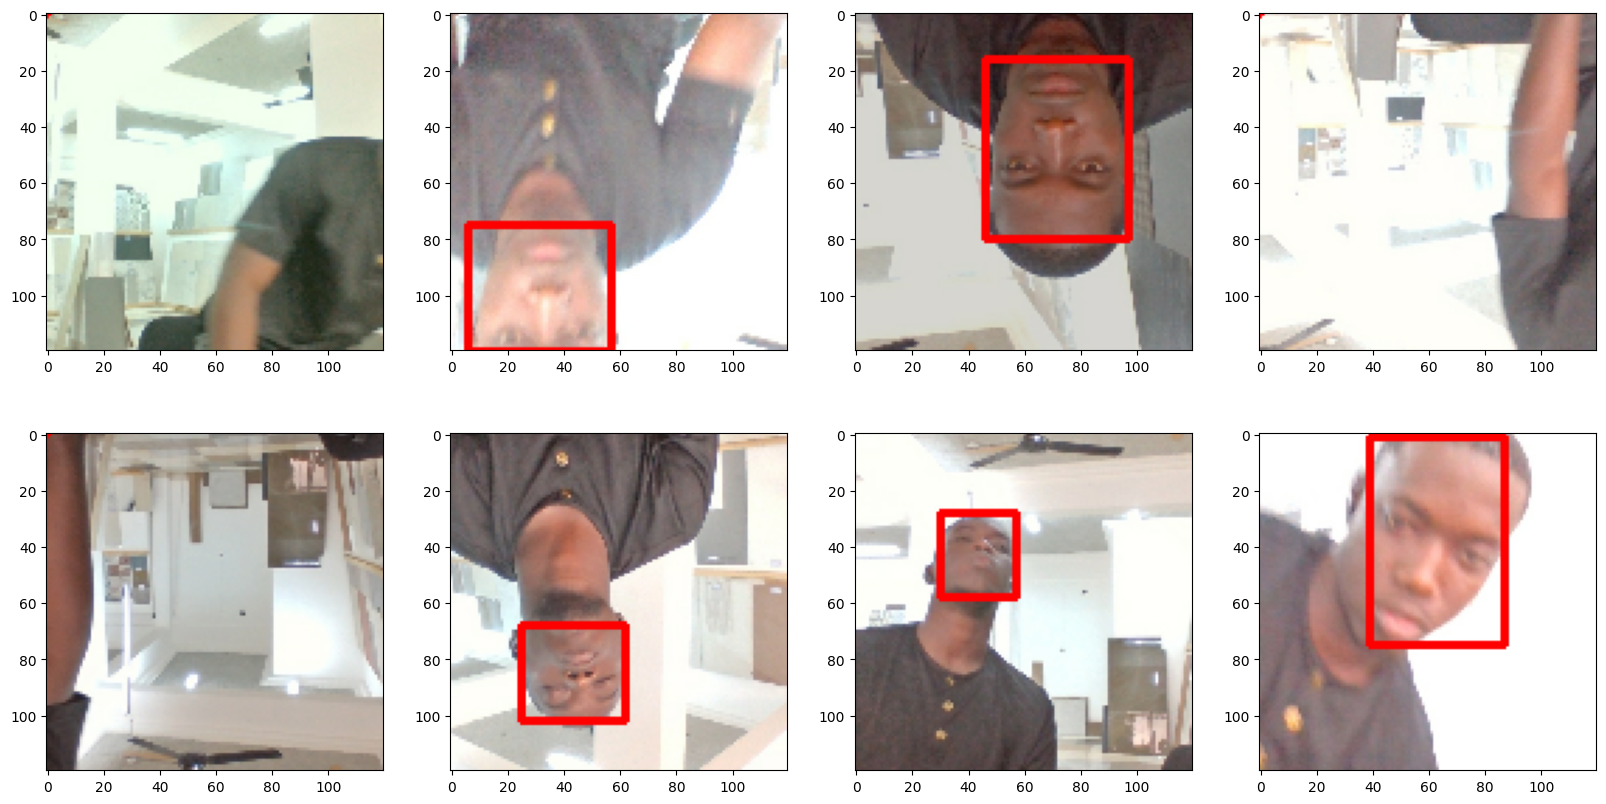

In [51]:
def display_image(z):
    fig,ax = plt.subplots(nrows=2,ncols=4,figsize=(20,10))
    for i in range(8):
        row = i // 4
        col = i % 4
        img = z[0][i]
        bbox = z[1][1][i]
        cv2.rectangle(img,
                    tuple(np.multiply(bbox[:2],[120,120]).astype(int)),
                    tuple(np.multiply(bbox[2:],[120,120]).astype(int)),
                    (255,0,0),2)
        ax[row,col].imshow(img)

display_image(z)


In [4]:
train_dataset = create_dataset('aug_data/train/')
test_dataset = create_dataset('aug_data/test/')
val_dataset = create_dataset('aug_data/val')

##### 6. BUILD MODEL AND DEFINE LOSS FUNCTION

In [29]:
from tensorflow.keras.layers import Input,Dense,GlobalMaxPool2D,Dropout,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16

In [18]:
def build_model():
    model_input = Input(shape=(120,120,3))

    vgg_model = VGG16(include_top=False)(model_input)

    #classification model
    f1 = GlobalMaxPool2D()(vgg_model)
    dense_layer = Dense(2048,activation='relu')(f1)
    class_layer = Dense(1,activation='sigmoid')(dense_layer)

    #regression model
    f2 = GlobalMaxPool2D()(vgg_model)
    dense_layer_reg = Dense(2048,activation='relu')(f2)
    reg_layer = Dense(4,activation='sigmoid')(dense_layer_reg)

    model = Model(inputs=model_input,outputs=[class_layer,reg_layer])

    return model


facetracker = build_model()
facetracker.summary()
    

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_1[0][0]']                
                                512)                                                              
                                                                                                  
 global_max_pooling2d (GlobalMa  (None, 512)         0           ['vgg16[0][0]']                  
 xPooling2D)                                                                                  

In [75]:
y_pred = facetracker.predict(z[0])
y_pred

1/1 [==============================] - 0s 455ms/step


[array([[1.6822012e-01],
        [1.0894322e-03],
        [7.5784628e-05],
        [1.2986197e-01],
        [1.3199428e-01],
        [4.3872654e-04],
        [2.8024675e-04],
        [1.0158884e-01]], dtype=float32),
 array([[8.6467808e-01, 3.8058871e-01, 4.8778850e-01, 9.0360028e-01],
        [9.5371771e-01, 6.7568249e-01, 2.8298932e-01, 9.9999917e-01],
        [1.3288928e-05, 1.0598300e-09, 1.0000000e+00, 1.0000000e+00],
        [8.9352578e-01, 4.0678281e-01, 4.7644907e-01, 9.4572574e-01],
        [9.4370598e-01, 4.2513952e-01, 4.8611408e-01, 9.3577927e-01],
        [1.1424715e-01, 3.1602085e-03, 4.2869335e-01, 9.9999946e-01],
        [9.8922151e-01, 3.8020953e-04, 3.5393661e-01, 1.0000000e+00],
        [1.1788300e-04, 2.0056251e-04, 1.0000000e+00, 1.0000000e+00]],
       dtype=float32)]

In [7]:
train_dataset = create_dataset('aug_data/train/')
test_dataset = create_dataset('aug_data/test/')
val_dataset = create_dataset('aug_data/val/')

##### 7. DEFINE LOSSES AND OPTIMIZERS

In [13]:
batch_per_epoch = len(train_dataset)

lr_decay = (1/0.75 - 1)

lr_schedule  = tf.keras.optimizers.schedules.ExponentialDecay(0.0001,decay_rate=lr_decay,decay_steps=1000)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)



In [14]:
def localization_loss(y_true,y_pred):
    part_1 = tf.reduce_sum(tf.square(y_true[:,:2] - y_pred[:,:2]))

    h_true = y_true[:,3] - y_true[:,1]
    w_true = y_true[:,2] - y_true[:,0]

    h_pred = y_pred[:,3] - y_pred[:,1]
    w_pred = y_pred[:,2] - y_pred[:,0]

    part_2 = tf.reduce_sum(tf.square(h_true-h_pred) + tf.square(w_true-w_pred))
    return part_1 + part_2

In [19]:
y_pred = facetracker.predict(z[0])
y_pred

1/1 [==============================] - 1s 1s/step


[array([[0.53314567],
        [0.43088752],
        [0.47144127],
        [0.3974886 ],
        [0.3765978 ],
        [0.35213193],
        [0.43671548],
        [0.39228404]], dtype=float32),
 array([[0.47158703, 0.5788935 , 0.6836985 , 0.70355713],
        [0.43193516, 0.52883965, 0.60948354, 0.58476716],
        [0.47112718, 0.48034355, 0.6808255 , 0.60710424],
        [0.43956622, 0.532823  , 0.6365596 , 0.6616645 ],
        [0.45580947, 0.48685881, 0.6768566 , 0.59922683],
        [0.48974693, 0.4770206 , 0.7038476 , 0.6114074 ],
        [0.42851067, 0.45273313, 0.6059112 , 0.54905224],
        [0.43486217, 0.5198747 , 0.735525  , 0.5844441 ]], dtype=float32)]

In [22]:
localization_loss(z[1][1],y_pred[1])

<tf.Tensor: shape=(), dtype=float32, numpy=2.877786>

In [15]:
z = train_dataset.as_numpy_iterator().next()
z

(array([[[[0.4050245 , 0.26875   , 0.2247549 ],
          [0.46029413, 0.31617647, 0.2627451 ],
          [0.46403188, 0.32352942, 0.25177696],
          ...,
          [0.95851713, 0.95030636, 0.92058825],
          [0.9284314 , 0.9171569 , 0.8514706 ],
          [0.7920956 , 0.6932598 , 0.63848037]],
 
         [[0.41672793, 0.26409313, 0.21360295],
          [0.48419118, 0.3189951 , 0.25625   ],
          [0.514277  , 0.35251224, 0.28241423],
          ...,
          [0.94307595, 0.9422794 , 0.8946691 ],
          [0.9394608 , 0.9091912 , 0.86599267],
          [0.62126225, 0.54767156, 0.53933823]],
 
         [[0.4194853 , 0.27028185, 0.20949756],
          [0.49313724, 0.3245098 , 0.2617647 ],
          [0.53180146, 0.36317402, 0.29693627],
          ...,
          [0.95      , 0.9504902 , 0.902451  ],
          [0.89031863, 0.82990193, 0.79601717],
          [0.5983456 , 0.5473039 , 0.56305146]],
 
         ...,
 
         [[0.6826593 , 0.6865809 , 0.66697305],
          [0.69074

In [23]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

##### 8.TRAIN NEURAL NETWORK

In [39]:
class FaceTracker(Model):
    def __init__(self,facetracker,**kwargs):
        super().__init__(**kwargs)
        self.facetracker = facetracker

    def compile(self,optimizer,classloss,localizationloss,**kwargs):
        super().compile(**kwargs)
        self.optimizer = optimizer
        self.classloss = classloss
        self.localizationloss = localizationloss

    def train_step(self,batch,**kwargs):

        X, y = batch
        with tf.GradientTape() as tape:
            label,bbox = self.facetracker(X,training=True)

            closs = self.classloss(y[0],label)
            lloss = self.localizationloss(y[1],bbox)
            total_loss = lloss + 0.5*closs
            grad = tape.gradient(total_loss,self.facetracker.trainable_variables)
        
        optimizer.apply_gradients(zip(grad,self.facetracker.trainable_variables))
        return {'total loss':total_loss,'class loss':closs,'regress loss':lloss}
    
    def test_step(self,batch,**kwargs):
        X, y = batch

        label,bbox = self.facetracker(X,training=False)
        closs = self.classloss(y[0],label)
        lloss = self.localizationloss(y[1],bbox)
        total_loss = lloss + 0.5*closs

        return {'total loss':total_loss,'class loss':closs,'regress loss':lloss}

    def call(self,X,**kwargs):
        return self.facetracker(X,**kwargs)


In [40]:
model = FaceTracker(facetracker)
model

In [41]:
model.compile(optimizer,classloss,regressloss)

In [42]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [43]:
hist_model = model.fit(train_dataset,epochs=40,validation_data=val_dataset,
                        callbacks=[tensorboard_callback])
                        

Epoch 1/40


465/465 [==============================] - 1402s 3s/step - total loss: 0.0153 - class loss: 0.0017 - regress loss: 0.0145 - val_total loss: 0.0197 - val_class loss: 1.0087e-04 - val_regress loss: 0.0197
Epoch 2/40
465/465 [==============================] - 1381s 3s/step - total loss: 0.0132 - class loss: 0.0022 - regress loss: 0.0121 - val_total loss: 0.0912 - val_class loss: 6.6758e-04 - val_regress loss: 0.0909
Epoch 3/40
465/465 [==============================] - 1359s 3s/step - total loss: 0.0105 - class loss: 0.0017 - regress loss: 0.0097 - val_total loss: 0.0443 - val_class loss: 0.0023 - val_regress loss: 0.0432
Epoch 4/40
465/465 [==============================] - 1363s 3s/step - total loss: 0.0075 - class loss: 0.0011 - regress loss: 0.0070 - val_total loss: 0.3524 - val_class loss: 8.8114e-04 - val_regress loss: 0.3520
Epoch 5/40
465/465 [==============================] - 1329s 3s/step - total loss: 0.0065 - class loss: 8.4128e-04 - regress loss: 0.0060 - val_total loss: 0.01

KeyboardInterrupt: 

In [44]:
facetracker.save('face_detection_model.h5')

In [49]:
from tensorflow.keras.models import load_model

In [50]:
imported_model = load_model('face_detection_model.h5')
imported_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_1[0][0]']                
                                512)                                                              
                                                                                                  
 global_max_pooling2d (GlobalMa  (None, 512)         0           ['vgg16[0][0]']                  
 xPooling2D)                                                                                  

In [52]:
imported_model.weights

[<tf.Variable 'block1_conv1/kernel:0' shape=(3, 3, 3, 64) dtype=float32, numpy=
 array([[[[ 4.28193420e-01,  1.16444692e-01,  3.32894064e-02, ...,
           -1.28530681e-01, -5.28212674e-02,  7.02317292e-03],
          [ 5.49404800e-01,  1.56439953e-02,  9.81191024e-02, ...,
           -8.06361213e-02, -5.08647822e-02,  3.70257646e-02],
          [ 4.79163498e-01, -1.78900197e-01,  3.69698294e-02, ...,
           -1.22581832e-01, -5.00164069e-02,  3.45180109e-02]],
 
         [[ 3.72089565e-01,  1.60908625e-01,  8.87489179e-04, ...,
           -1.44632459e-01, -2.34832421e-01, -6.36690035e-02],
          [ 4.39030826e-01,  4.14952151e-02,  5.06150946e-02, ...,
           -9.45928246e-02, -2.95931190e-01, -7.09199682e-02],
          [ 4.07645881e-01, -1.77243173e-01, -5.57410903e-03, ...,
           -1.17647715e-01, -2.76166737e-01, -3.94568369e-02]],
 
         [[-6.28149882e-02,  1.35152638e-01, -1.16732761e-01, ...,
           -1.36422515e-01, -3.77250701e-01, -3.01310956e-01],
    

##### 8. REAL TIME PREDICTION

In [55]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret,frame = cap.read()

    frame = frame[50:500,50:500,:]
    rgb_frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)

    resized_frame = tf.image.resize(rgb_frame,(120,120))

    y_pred = facetracker.predict(np.expand_dims(resized_frame.numpy()/255.0,0))

    if y_pred[0][0] > 0.5:
        bbox = y_pred[1][0]
        cv2.rectangle(frame,
                        tuple(np.multiply(bbox[:2],[450,450]).astype(int)),
                        tuple(np.multiply(bbox[2:],[450,450]).astype(int)),
                        (255,0,0),2)

        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(bbox[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(bbox[:2], [450,450]).astype(int),
                                    [80,0])), 1)

        #control the text rendered
        cv2.putText(frame,'face',tuple(np.add(np.multiply(bbox[:2],[450,450]).astype(int),[0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)

    cv2.imshow('frame',frame)

    
    print(y_pred)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 136ms/step
[array([[0.17138883]], dtype=float32), array([[0.04454088, 0.04027728, 0.11893123, 0.1611943 ]], dtype=float32)]
1/1 [==============================] - 0s 218ms/step
[array([[0.87427104]], dtype=float32), array([[0.11834091, 0.08608498, 0.3261003 , 0.40818295]], dtype=float32)]
1/1 [==============================] - 0s 170ms/step
[array([[0.98579514]], dtype=float32), array([[0.21596098, 0.04917116, 0.48904285, 0.41867802]], dtype=float32)]
1/1 [==============================] - 0s 214ms/step
[array([[0.96879965]], dtype=float32), array([[0.21971072, 0.05180839, 0.5018139 , 0.36830035]], dtype=float32)]
1/1 [==============================] - 0s 151ms/step
[array([[0.91251576]], dtype=float32), array([[0.17628258, 0.05156164, 0.40871257, 0.31229782]], dtype=float32)]
1/1 [==============================] - 0s 152ms/step
[array([[0.4438935]], dtype=float32), array([[0.08929413, 0.03843897, 0.2166456 , 0.17523897]], dtype=float32)]
1/1 [

In [1]:
import tensorflow as tf
import json
import cv2
import os

# Define input and output directories
input_directory = os.path.join('aug_data','train','label')  # Replace with your input directory path
output_directory = os.path.join('scripts')   # Replace with your output directory path
os.makedirs(output_directory, exist_ok=True)

# Function to read JSON data from a file
def read_json_file(json_filename):
    with open(json_filename, 'r') as json_file:
        data = json.load(json_file)
    return data

# Function to create a TFRecord
def create_example(image_bytes, label, bboxes):
    feature = {
        'image': tf.train.Feature(bytes_list=tf.train.BytesList(value=[image_bytes])),
        'label': tf.train.Feature(int64_list=tf.train.Int64List(value=[label])),
        'bboxes': tf.train.Feature(float_list=tf.train.FloatList(value=bboxes)),
    }
    return tf.train.Example(features=tf.train.Features(feature=feature))

# Iterate through the files in the input directory
for filename in os.listdir(input_directory):
    if filename.endswith(".json"):
        # Read JSON data
        json_data = read_json_file(os.path.join(input_directory, filename))
        
        # Load the image using OpenCV
        image_filename = os.path.join(input_directory, json_data["images"])
        image = cv2.imread(image_filename)
        
        if image is None:
            print(f"Warning: Image not found for {filename}")
            continue
        
        # Convert the image to bytes
        image_bytes = tf.io.encode_jpeg(image).numpy()
        
        # Create TFRecord filename
        tfrecord_filename = os.path.splitext(filename)[0] + '.tfrecord'
        tfrecord_filepath = os.path.join(output_directory, tfrecord_filename)
        
        # Write to the TFRecord file
        with tf.io.TFRecordWriter(tfrecord_filepath) as writer:
            example = create_example(image_bytes, json_data["label"], json_data["bboxes"])
            writer.write(example.SerializeToString())


KeyboardInterrupt: 